In [2]:
import pandas as pd
import numpy as np
np.random.seed(0)

%matplotlib inline

In [3]:
train = pd.read_hdf('../input/train.realestate_raw.h5')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19144 entries, 0 to 0
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   building            18683 non-null  object
 1   extra_benefits      9734 non-null   object
 2   parking             6854 non-null   object
 3   apartament          18874 non-null  object
 4   offer               18876 non-null  object
 5   surroundings        19144 non-null  object
 6   extra_description   16732 non-null  object
 7   benefit_investment  1383 non-null   object
 8   broker_license      19144 non-null  object
 9   stats               19144 non-null  object
 10  broker_id           19144 non-null  int16 
 11  broker_company_id   19144 non-null  int16 
dtypes: int16(2), object(10)
memory usage: 1.7+ MB


In [5]:
train.head()

,building,extra_benefits,parking,apartament,offer,surroundings,extra_description,benefit_investment,broker_license,stats,broker_id,broker_company_id
0,"{'Typ budynku': 'apartamentowiec', 'Liczba pię...",NaN,garaż,"{'Łazienka': 'w aneksie', 'Liczba pokoi': 'par...",699 000 zł (4 288 zł/m,{'Zdrowie': [' ...,[OSTATNIE WOLNE LOKALE !!!!!!!!!! OSIED...,NaN,,"[[Źródło: , Osoba prywatna], [Rynek: , wtórny]...",0,0
0,"{'Typ budynku': 'apartamentowiec', 'Liczba pię...",NaN,NaN,"{'Liczba pokoi': '8', 'Kuchnia': 'bardzo dobry...",560 000 zł (8 917 zł/m,{'Zdrowie': [' ...,[Mieszkanie typu studio na warszawskiej Ochoci...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",1,1
0,"{'Typ budynku': 'blok', 'Liczba pięter': '4', ...","centralne ogrzewanie, domofon, teren ogrodzony",NaN,"{'Łazienka': 'z oknem, oddzielna', 'Liczba pok...",309 000 zł (6 119 zł/m,{'Zdrowie': [' ...,"[Oferujemy mieszkanie na 3 piętrze, dwustronne...",NaN,,"[[Źródło: , Osoba prywatna], [Rynek: , wtórny]...",2,0
0,"{'Typ budynku': 'blok', 'Liczba pięter': '4', ...",NaN,NaN,"{'Liczba pokoi': 'parter', 'Kuchnia': 'do remo...",270 000 zł (7 297 zł/m,{},"[Witam, oferuję Państwu mieszkanie na spokojny...",NaN,Nr licencji pośrednika: 11710,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",3,2
0,"{'Typ budynku': 'blok', 'Liczba pięter': '3', ...",NaN,NaN,"{'Liczba pokoi': '3', 'Kuchnia': '3', 'Forma w...",500 000 zł (7 042 zł/m,{'Zdrowie': [' ...,[Jeśli chcesz mieszkać w doskonale skomunikowa...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",4,3


In [10]:
def get_value(items, key, type_value=np.int8, filter_=None):
    try:
        value = filter_(items[key]) if filter_ else items[key]
        return type_value(value)
    except:
        #print(items)
        return -1

In [7]:
def num_filter(val):
    return re.sub('[^0-9]','', val)

def float_filter(val):
    return re.sub('[^0-9\,\.]','', val).replace(',', '.')

def str_filter(val):
    return val.lower().strip()

In [7]:
train['building_num_floor'] = train['building'].map(lambda x: get_value(x, 'Liczba pięter', np.int8, num_filter))
train['type_building'] = train['building'].map(lambda x: get_value(x, 'Typ budynku', np.str, str_filter ))
train['year_building'] = train['building'].map(lambda x: get_value(x, 'Rok budowy', np.int16, num_filter ))
train['material_building'] = train['building'].map(lambda x: get_value(x, 'Materiał', np.str, str_filter ))

In [8]:
all_benefits = set()

def extract_benefits(benefit):
    if 'nan' == str(benefit): return
    
    for value in benefit.split(','):
        value = value.lower().strip()
        if '' == value: continue
            
        all_benefits.add(value)
    
_ = train['extra_benefits'].map(extract_benefits)

all_benefits

{'antresola',
 'centralne ogrzewanie',
 'domofon',
 'internet',
 'loft',
 'ochrona',
 'ogrzewanie elektryczne',
 'ogrzewanie miejskie',
 'ogrzewanie podłogowe',
 'patio',
 'podjazd dla niepełnosprawnych',
 'recepcja',
 'telefon',
 'teren ogrodzony',
 'tv kablowa',
 'wideofon',
 'winda'}

In [9]:
idx_benefits, labels_benefits = pd.factorize( list(all_benefits) )

for idx_benefit in idx_benefits:
    cat_name = 'benefit_{0}'.format( labels_benefits[idx_benefit].replace(' ', '_') )
    ben_label = labels_benefits[idx_benefit]
    
    train[cat_name] = train['extra_benefits'].map(lambda x: int(ben_label in x.lower()) if 'nan' != str(x) else 0 )

In [10]:
train.head()

,building,extra_benefits,parking,apartament,offer,surroundings,extra_description,benefit_investment,broker_license,stats,...,benefit_recepcja,benefit_telefon,benefit_ogrzewanie_elektryczne,benefit_winda,benefit_centralne_ogrzewanie,benefit_domofon,benefit_podjazd_dla_niepełnosprawnych,benefit_ogrzewanie_miejskie,benefit_loft,benefit_ochrona
0,"{'Typ budynku': 'apartamentowiec', 'Liczba pię...",NaN,garaż,"{'Łazienka': 'w aneksie', 'Liczba pokoi': 'par...",699 000 zł (4 288 zł/m,{'Zdrowie': [' ...,[OSTATNIE WOLNE LOKALE !!!!!!!!!! OSIED...,NaN,,"[[Źródło: , Osoba prywatna], [Rynek: , wtórny]...",...,0,0,0,0,0,0,0,0,0,0
0,"{'Typ budynku': 'apartamentowiec', 'Liczba pię...",NaN,NaN,"{'Liczba pokoi': '8', 'Kuchnia': 'bardzo dobry...",560 000 zł (8 917 zł/m,{'Zdrowie': [' ...,[Mieszkanie typu studio na warszawskiej Ochoci...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,0,0,0,0,0,0,0,0,0,0
0,"{'Typ budynku': 'blok', 'Liczba pięter': '4', ...","centralne ogrzewanie, domofon, teren ogrodzony",NaN,"{'Łazienka': 'z oknem, oddzielna', 'Liczba pok...",309 000 zł (6 119 zł/m,{'Zdrowie': [' ...,"[Oferujemy mieszkanie na 3 piętrze, dwustronne...",NaN,,"[[Źródło: , Osoba prywatna], [Rynek: , wtórny]...",...,0,0,0,0,1,1,0,0,0,0
0,"{'Typ budynku': 'blok', 'Liczba pięter': '4', ...",NaN,NaN,"{'Liczba pokoi': 'parter', 'Kuchnia': 'do remo...",270 000 zł (7 297 zł/m,{},"[Witam, oferuję Państwu mieszkanie na spokojny...",NaN,Nr licencji pośrednika: 11710,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,0,0,0,0,0,0,0,0,0,0
0,"{'Typ budynku': 'blok', 'Liczba pięter': '3', ...",NaN,NaN,"{'Liczba pokoi': '3', 'Kuchnia': '3', 'Forma w...",500 000 zł (7 042 zł/m,{'Zdrowie': [' ...,[Jeśli chcesz mieszkać w doskonale skomunikowa...,NaN,,"[[Źródło: , Biuro nieruchomości], [Rynek: , wt...",...,0,0,0,0,0,0,0,0,0,0


In [11]:
def get_price(value):
    try:
        if 'nan' == str(value): return np.nan        
        return float(value.split('zł')[0].replace(' ', '').replace(',', '.'))
    except:
        #print(value)
        return -1
    
train['price'] = train.offer.map(get_price)

In [12]:
orders = {
    'Forma własności': 1,
    'Powierzchnia': 2,
    'Piętro': 3,
    'Liczba pokoi': 4,
    'Liczba poziomów': 5,
    'Wykończenie': 6,
    'Stan mieszkania': 7,
    'Głośność': 8,
    'Kuchnia': 9,
    'Łazienka': 10,
    'Stan łazienki': 11,
    'Stan instalacji': 12,
    'Okna': 13,
    'Usytuowanie wzgl. stron świata': 14,
    'Powierzchnia dodatkowa': 15
}

def get_map_attrs(apartament):
    sorted_attrs = sorted([ (key, orders[key]) for key in apartament.keys()], key=lambda key: key[1])

    map_attrs = {}
    for idx, attr in enumerate(sorted_attrs):
        if attr[0] == 'Forma własności' or attr[0] == 'Powierzchnia': 
            map_attrs[attr[0]] = sorted_attrs[idx][0]
            continue

        if idx + 1 < len(sorted_attrs):
            map_attrs[attr[0]] = sorted_attrs[idx+1][0]
            
    return map_attrs
            
def do_apartament_fix(apartament):
    if 'nan' == str(apartament): return np.nan
    
    map_attrs = get_map_attrs(apartament)
    apartment_fix = {}
    for key in apartament:
        if key not in map_attrs: continue
        apartment_fix[key] = apartament[map_attrs[key]]
            
    return apartment_fix

train['apartament_fix'] = train['apartament'].map(do_apartament_fix)

In [13]:
train['apartament_ownership'] = train['apartament_fix'].map(lambda x: get_value(x, 'Forma własności', np.str, str_filter))
train['apartament_area'] = train['apartament_fix'].map(lambda x: get_value(x, 'Powierzchnia', np.float, float_filter))
train['apartament_floor'] = train['apartament_fix'].map(lambda x: get_value(x, 'Piętro', np.str, str_filter))
train['apartament_num_rooms'] = train['apartament_fix'].map(lambda x: get_value(x, 'Liczba pokoi', np.int8, num_filter))
train['apartament_num_levels'] = train['apartament_fix'].map(lambda x: get_value(x, 'Liczba poziomów', np.str, str_filter))
train['apartament_finished'] = train['apartament_fix'].map(lambda x: get_value(x, 'Wykończenie', np.str, str_filter))
train['apartament_condition'] = train['apartament_fix'].map(lambda x: get_value(x, 'Stan mieszkania', np.str, str_filter))
train['apartament_noise'] = train['apartament_fix'].map(lambda x: get_value(x, 'Głośność', np.str, str_filter))
train['apartament_kitchen'] = train['apartament_fix'].map(lambda x: get_value(x, 'Kuchnia', np.str, str_filter))
train['apartament_bathroom'] = train['apartament_fix'].map(lambda x: get_value(x, 'Łazienka', np.str, str_filter))
train['apartament_bahtroom_condition'] = train['apartament_fix'].map(lambda x: get_value(x, 'Stan łazienki', np.str, str_filter))
train['apartament_installation_condition'] = train['apartament_fix'].map(lambda x: get_value(x, 'Stan instalacji', np.str, str_filter))
train['apartament_window'] = train['apartament_fix'].map(lambda x: get_value(x, 'Okna', np.str, str_filter))
train['apartament_appartament'] = train['apartament_fix'].map(lambda x: get_value(x, 'Usytuowanie wzgl. stron świata', np.str, str_filter))

In [14]:
print(train.head(1).extra_description[0])

['OSTATNIE WOLNE LOKALE !!!!!!!!!!        OSIEDLE ODDANE DO UŻYTKOWANIA', '\n', '\nRezydencje TAMTARADEI to nowoczesny i elegancki kompleks mieszkalny utrzymany w duchu przyjaznego modernizmu, dedykowany rodzinom.', '\n', '\n W skład Rezydencji TAMTARADEI wchodzi pięć budynków cztero-lokalowych o jednolitej wysokości trójkondygnacyjnej.', '\n', '\n Każdy lokal rezydencji posiada powierzchnię całkowitą 193 m2, w tym użytkową 163 m2. Parter to część dzienna rezydencji z przestronnym i niezwykle jasnym salonem (35 m2) z kuchnią w aneksie (8m2) z przyległym pomieszczeniem gospodarczym oraz wc. W poziomie parteru zawarty jest również garaż (16m2).', '\n I piętro natomiast to część nocna zawierająca 3 sypialnie oraz 2 łazienki (jedna z nich z bezpośrednim wejściem z sypialni, do której przynależy również taras).', '\n Na II piętrze rezydencji znajduje się otwarta przestrzeń typu studio oraz łazienka. Niewątpliwym atutem ostatniej kondygnacji są 2 tarasy, w tym jeden o powierzchni 24 m2 !', '

In [15]:
all_benefits_investment = set()

def extract_benefits_investment(benefit):
    if 'nan' == str(benefit): return
    
    for value in benefit.split(','):
        value = value.lower().strip()
        if '' == value: continue
            
        all_benefits_investment.add(value)
    
_ = train['benefit_investment'].map(extract_benefits_investment)

all_benefits_investment

{'antresola',
 'centralne ogrzewanie',
 'domofon',
 'internet',
 'loft',
 'ochrona',
 'ogrzewanie miejskie',
 'ogrzewanie podłogowe',
 'patio',
 'podjazd dla niepełnosprawnych',
 'recepcja',
 'telefon',
 'teren ogrodzony',
 'tv kablowa',
 'wideofon',
 'winda'}

In [16]:
list(train.stats.head(1))

[[['Źródło: ', 'Osoba prywatna'],
  ['Rynek: ', 'wtórny'],
  ['Dodano: ', 'więcej niż miesiąc temu'],
  ['Aktualizacja: ', 'dzisiaj'],
  ['Liczba odsłon: ', '2596']]]

In [17]:
train['stats_who'] = train.stats.map(lambda x: str(x[0][1].lower().strip()) if x else 'unknown')
train['stats_market'] = train.stats.map(lambda x: x[1][1].lower().strip() if x else 'unknown')
train['stats_created_at'] = train.stats.map(lambda x: x[2][1].lower().strip() if x else 'unknown')
train['stats_updated_at'] = train.stats.map(lambda x: x[3][1].lower().strip() if x else 'unknown')
train['stats_viewers'] = train.stats.map(lambda x: int(x[4][1].lower().strip()) if x and len(x) == 5 else -1)

biuro nieruchomości    16449
deweloper               2387
unknown                  268
osoba prywatna            28
instytucja                12
Name: stats_who, dtype: int64
AxesSubplot(0.125,0.125;0.775x0.755)
Index(['osoba prywatna', 'biuro nieruchomości', 'deweloper', 'unknown',
       'instytucja'],
      dtype='object')


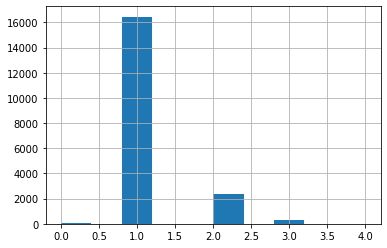

In [18]:
print(train['stats_who'].value_counts())
train['stats_who_cat'], labels = pd.factorize(train['stats_who'])
print( train['stats_who_cat'].hist() )
print(labels)

In [19]:
pd.qcut(train[ train.stats_viewers != -1 ]['stats_viewers'], 5).unique()

[(319.0, 90536.0], (189.0, 319.0], (119.0, 189.0], (3.999, 75.0], (75.0, 119.0]]
Categories (5, interval[float64]): [(3.999, 75.0] < (75.0, 119.0] < (119.0, 189.0] < (189.0, 319.0] < (319.0, 90536.0]]

In [20]:
if 'building' in train: del train['building']
if 'extra_benefits' in train: del train['extra_benefits']
if 'apartament' in train: del train['apartament']
if 'offer' in train: del train['offer']
if 'stats' in train: del train['stats']